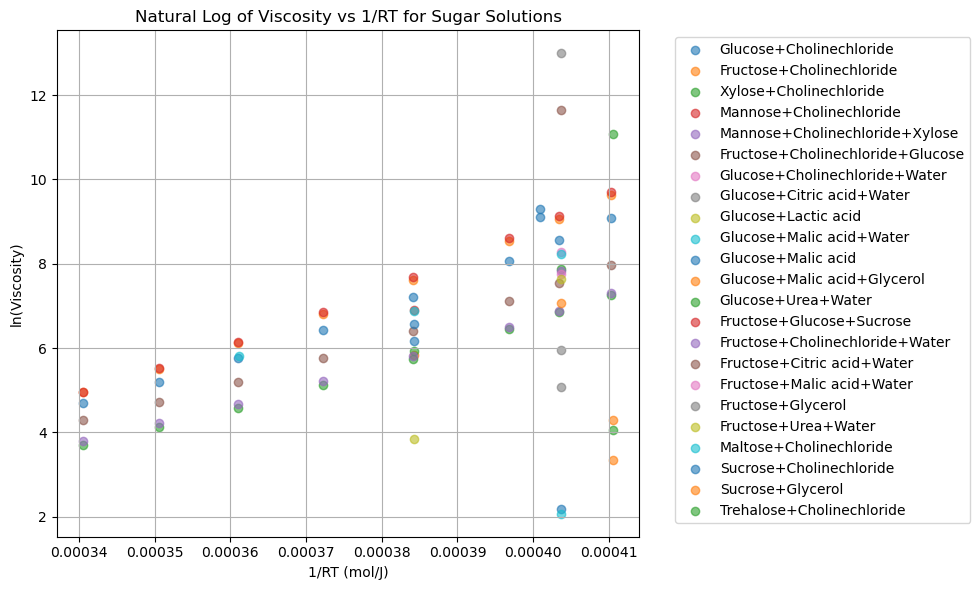

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
sugar_data = pd.read_csv('/home/sga/Code/FAIRFluids/FAIRFluids/data/csvs/sugar.csv')

# Convert temperature values by replacing comma with dot and converting to float
sugar_data['Temperature'] = sugar_data['Temperature'].str.replace(',', '.').astype(float)
sugar_data['Viscosity'] = sugar_data['Viscosity'].str.replace(',', '.').astype(float)

# Calculate 1/(R*T)
R = 8.314  # Gas constant in J/(mol·K)
sugar_data['1/RT'] = 1 / (R * sugar_data['Temperature'])

# Calculate ln(viscosity)
sugar_data['ln_viscosity'] = np.log(sugar_data['Viscosity'])

# Create a combination name for grouping
sugar_data['mixture'] = sugar_data[['Comp1', 'Comp2', 'Comp3', 'Water']].apply(lambda x: '+'.join(x.dropna().astype(str)), axis=1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each mixture group with different color and label
for mixture in sugar_data['mixture'].unique():
    mask = sugar_data['mixture'] == mixture
    plt.scatter(sugar_data.loc[mask, '1/RT'], 
               sugar_data.loc[mask, 'ln_viscosity'], 
               label=mixture, 
               alpha=0.6)

plt.xlabel('1/RT (mol/J)')
plt.ylabel('ln(Viscosity)')
plt.title('Natural Log of Viscosity vs 1/RT for Sugar Solutions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



